In [ ]:
!nvidia-smi

Sat Jan 11 04:43:01 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 2.0 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="AVTVYWwOyJBSBw0jbFQf")
project = rf.workspace("taco-9911u").project("taco-trash-annotations-in-context-bumvw")
version = project.version(10)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to TACO:-Trash-Annotations-in-Context-Dataset-10 in yolov11:: 100%|██████████| 6343/6343 [00:02<00:00, 2715.86it/s]


In [ ]:
# Load a model
model = YOLO("yolo11n-seg.pt")

# Train the model
train_results = model.train(
    data="/content/TACO:-Trash-Annotations-in-Context-Dataset-10/data.yaml",  # path to dataset YAML
    epochs=20,  # number of training epochs
    imgsz=640,  # training image size
    device=0,  # device to run on, i.e. device=0 or device=0,1,2,3 or device=cpu
)

100%|██████████| 5.90M/5.90M [00:00<00:00, 35.3MB/s]


Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolo11n-seg.pt, data=/content/TACO:-Trash-Annotations-in-Context-Dataset-10/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

100%|██████████| 755k/755k [00:00<00:00, 36.0MB/s]


Overriding model.yaml nc=80 with nc=21

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 156MB/s]


AMP: checks passed ✅


train: Scanning /content/TACO:-Trash-Annotations-in-Context-Dataset-10/train/labels... 3057 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3057/3057 [00:02<00:00, 1520.77it/s]


train: New cache created: /content/TACO:-Trash-Annotations-in-Context-Dataset-10/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/TACO:-Trash-Annotations-in-Context-Dataset-10/valid/labels... 110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<00:00, 694.33it/s]

val: New cache created: /content/TACO:-Trash-Annotations-in-Context-Dataset-10/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.0004, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/20      3.29G      1.167      2.509      4.581      1.165          1        640: 100%|██████████| 192/192 [01:42<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        110        164      0.513      0.072     0.0479     0.0379       0.51     0.0671     0.0448     0.0337



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/20      3.11G      1.229      2.289      3.825       1.17          3        640: 100%|██████████| 192/192 [01:35<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all        110        164      0.495      0.116      0.105     0.0802      0.498       0.12      0.107     0.0815



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/20       3.1G      1.218      2.258      3.403      1.177          2        640: 100%|██████████| 192/192 [01:30<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        110        164       0.51     0.0991      0.119     0.0878       0.51     0.0991      0.114     0.0883



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/20      3.06G      1.179      2.195      3.159      1.159          8        640: 100%|██████████| 192/192 [01:34<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]

                   all        110        164      0.452      0.193      0.147      0.119      0.406      0.208      0.144      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/20      3.09G      1.161      2.197      2.998      1.142          0        640: 100%|██████████| 192/192 [01:32<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.28it/s]


                   all        110        164       0.35      0.197      0.137     0.0985      0.399      0.192      0.148     0.0995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/20      3.07G      1.141      2.138      2.822      1.127          1        640: 100%|██████████| 192/192 [01:32<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]

                   all        110        164      0.437       0.22      0.171       0.14      0.452      0.225      0.178      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/20      3.09G      1.111      2.031       2.64      1.114          3        640: 100%|██████████| 192/192 [01:28<00:00,  2.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all        110        164       0.56      0.186      0.178      0.145      0.563      0.193       0.19      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/20      3.03G       1.09      2.011      2.504      1.101          2        640: 100%|██████████| 192/192 [01:31<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.62it/s]

                   all        110        164      0.564      0.178      0.198      0.165       0.57      0.184      0.202      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/20      3.04G      1.082      1.944      2.434      1.093          0        640: 100%|██████████| 192/192 [01:33<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        110        164      0.641      0.164      0.183      0.155      0.652      0.172      0.188      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/20       3.1G      1.072      1.926      2.298      1.087          1        640: 100%|██████████| 192/192 [01:33<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]


                   all        110        164      0.775      0.123      0.193      0.159      0.775      0.123       0.19      0.151
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/20      3.05G       1.05        1.9      2.286      1.086          1        640: 100%|██████████| 192/192 [01:28<00:00,  2.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]

                   all        110        164      0.557      0.174      0.212      0.175      0.543       0.18      0.209      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/20      2.99G       1.04      1.873      2.164      1.085          1        640: 100%|██████████| 192/192 [01:23<00:00,  2.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        110        164      0.502      0.258      0.217      0.183      0.499      0.255      0.217      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/20      2.99G      1.011      1.807      2.041      1.065          1        640: 100%|██████████| 192/192 [01:26<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        110        164      0.536       0.24      0.263      0.222      0.532      0.244      0.262      0.216



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/20      3.13G     0.9852      1.761      1.909      1.043          1        640: 100%|██████████| 192/192 [01:26<00:00,  2.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        110        164      0.396      0.294      0.239      0.203      0.386       0.29      0.234      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/20      3.04G     0.9616      1.709      1.821      1.031          1        640: 100%|██████████| 192/192 [01:23<00:00,  2.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        110        164      0.378      0.271      0.245      0.202      0.385       0.28      0.253      0.203



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/20       3.1G     0.9658      1.687      1.778      1.036          1        640: 100%|██████████| 192/192 [01:26<00:00,  2.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        110        164      0.331      0.307      0.224      0.186      0.331      0.304      0.225      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/20      2.99G     0.9462      1.668      1.671      1.022          2        640: 100%|██████████| 192/192 [01:23<00:00,  2.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        110        164      0.487      0.243      0.238      0.205      0.487      0.243      0.239      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/20      2.99G     0.9169      1.623      1.601      1.006          1        640: 100%|██████████| 192/192 [01:20<00:00,  2.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        110        164      0.533      0.258      0.261      0.228      0.523      0.254      0.255      0.213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/20      3.03G     0.8951      1.594      1.542      0.997          1        640: 100%|██████████| 192/192 [01:26<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.65it/s]

                   all        110        164      0.525      0.266       0.27      0.229      0.524      0.267       0.27      0.219



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/20      2.99G     0.8875      1.581      1.508     0.9952          1        640: 100%|██████████| 192/192 [01:24<00:00,  2.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.40it/s]

                   all        110        164      0.462      0.282      0.245       0.21       0.46      0.272      0.242      0.199



20 epochs completed in 0.515 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.0MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.0MB

Validating runs/segment/train/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n-seg summary (fused): 265 layers, 2,838,663 parameters, 0 gradients, 10.2 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.09it/s]


                   all        110        164      0.523      0.268       0.27      0.227      0.522      0.269       0.27      0.218
  Clear plastic bottle         21         28      0.651      0.607      0.627      0.495      0.645      0.607      0.641      0.499
     Corrugated carton          5          7      0.234      0.286      0.111     0.0842      0.117      0.143      0.048     0.0342
          Crisp packet          4          4       0.21       0.34      0.208      0.187       0.21      0.342      0.208      0.162
Disposable food container          4          4          0          0      0.107      0.107          0          0      0.107     0.0972
Disposable plastic cup         12         13      0.254      0.385      0.206      0.121      0.254      0.385      0.206      0.116
            Egg carton          2          2          1          0    0.00748    0.00449          1          0    0.00748    0.00748
              Foam cup          2          2          1          0


image 1/1 /content/1.jpg: 640x640 1 Other plastic bottle, 1 Plastic bottle cap, 18.3ms
Speed: 2.8ms preprocess, 18.3ms inference, 4.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict


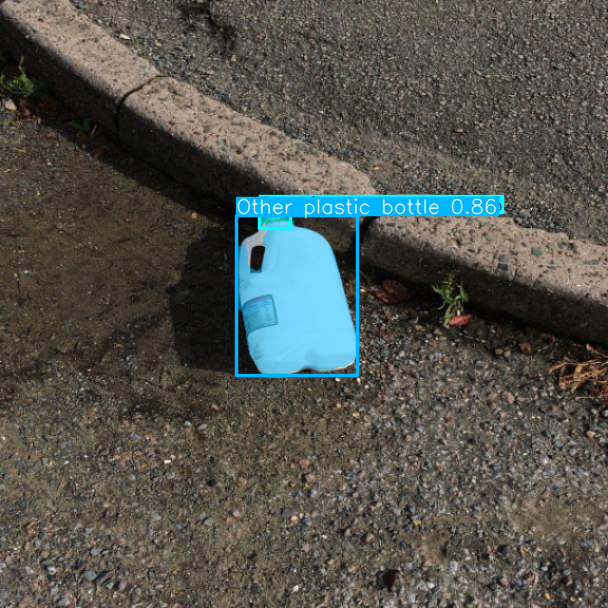

In [ ]:
model = YOLO('/content/runs/segment/train/weights/best.pt')
results = model("/content/1.jpg", save=True)
results[0].show()


image 1/1 /content/2.jpg: 640x640 1 Clear plastic bottle, 1 Plastic bottle cap, 33.3ms
Speed: 8.0ms preprocess, 33.3ms inference, 42.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict2


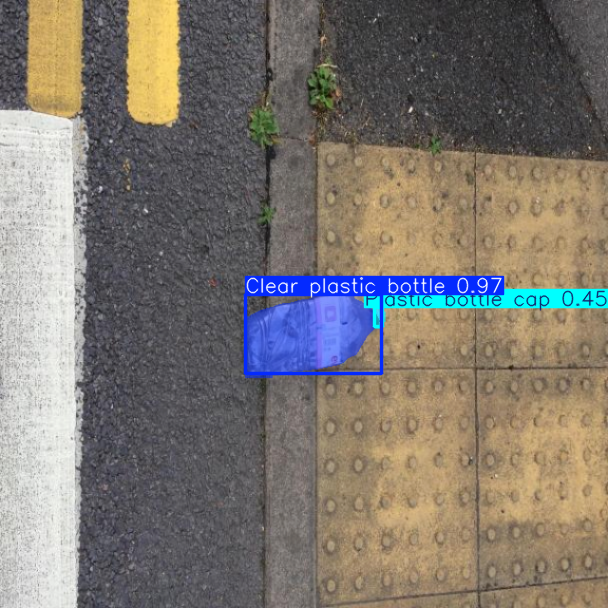

In [ ]:
model = YOLO('/content/runs/segment/train/weights/best.pt')
results = model("/content/2.jpg", save=True)
results[0].show()


image 1/1 /content/4.jpg: 640x640 1 Corrugated carton, 25.6ms
Speed: 3.8ms preprocess, 25.6ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict5


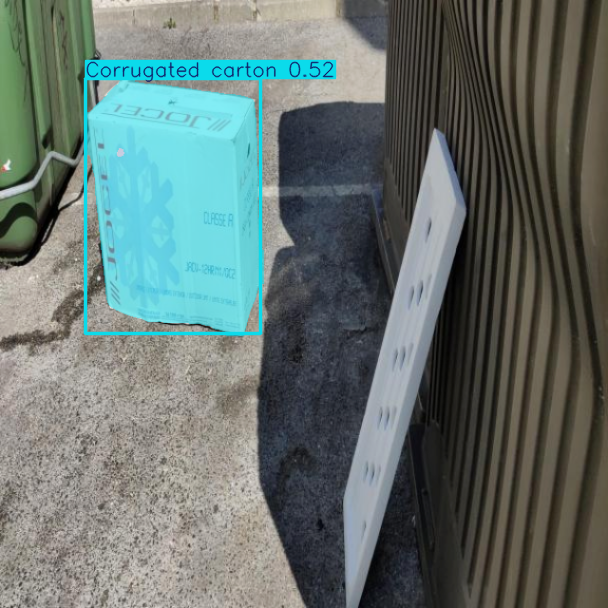

In [ ]:
model = YOLO('/content/runs/segment/train/weights/best.pt')
results = model("/content/4.jpg", save=True)
results[0].show()


image 1/1 /content/5.jpg: 640x640 2 Corrugated cartons, 15.9ms
Speed: 2.8ms preprocess, 15.9ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict6


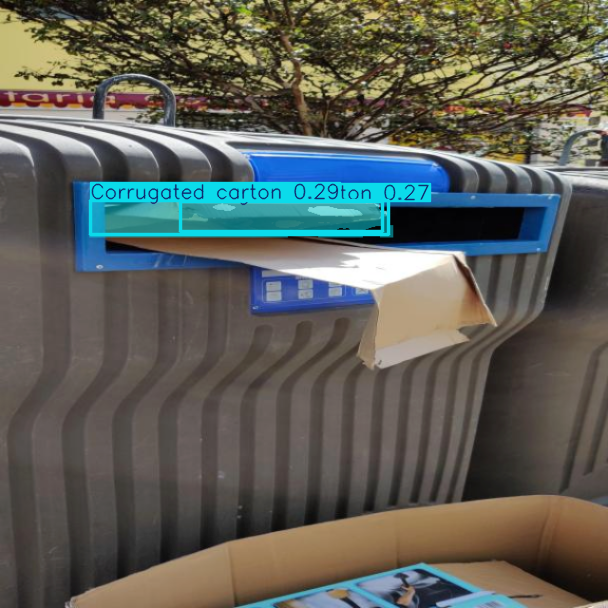

In [ ]:
model = YOLO('/content/runs/segment/train/weights/best.pt')
results = model("/content/5.jpg", save=True)
results[0].show()